# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Setting pandas maximum rows to dsiplay in cell output
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 200

#### Getting data

In [4]:
loan = pd.read_csv("loan/loan.csv")

In [5]:
# Seeing general information about data
# like the shape of the data set and column types
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
# First few rows of data
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### Identifying Missing Values

In [7]:
# Total number of missing values across various columns
loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [8]:
# Percentage of missing values in each column
round(100*(loan.isnull().sum()/len(loan.index)), 2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

**Dropping Columns**

We see there are large number of columns having all their values missing

**We decided to drop those columns where missing values are greater than 30%.**

Seeing the column name 'desc'

In [9]:
loan.desc.dtypes

dtype('O')

In [10]:
loan.desc.head()

0      Borrower added on 12/22/11 > I need to upgra...
1      Borrower added on 12/22/11 > I plan to use t...
2                                                  NaN
3      Borrower added on 12/21/11 > to pay for prop...
4      Borrower added on 12/21/11 > I plan on combi...
Name: desc, dtype: object

In [11]:
## Getting the list of columns to drop
col_to_drop = loan.isnull().sum()[round(100*(loan.isnull().sum()/len(loan.index)), 2).apply(lambda x: x > 30)]

In [12]:
col_to_drop

desc                              12940
mths_since_last_delinq            25682
mths_since_last_record            36931
next_pymnt_d                      38577
mths_since_last_major_derog       39717
annual_inc_joint                  39717
dti_joint                         39717
verification_status_joint         39717
tot_coll_amt                      39717
tot_cur_bal                       39717
open_acc_6m                       39717
open_il_6m                        39717
open_il_12m                       39717
open_il_24m                       39717
mths_since_rcnt_il                39717
total_bal_il                      39717
il_util                           39717
open_rv_12m                       39717
open_rv_24m                       39717
max_bal_bc                        39717
all_util                          39717
total_rev_hi_lim                  39717
inq_fi                            39717
total_cu_tl                       39717
inq_last_12m                      39717


In [13]:
# Dropping Columns
loan1 = loan.drop(col_to_drop.index, axis=1)

In [14]:
#Seeing info again
#The number of columns have been reduced to 53.
loan1.shape

(39717, 53)

In [15]:
##Checking missing values again
loan1.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

In [16]:
#Checking missing values across rows
loan1[loan1.isnull().sum(axis=1) > 4]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
39659,121568,121574,4000,4000,1925.0,36 months,9.64%,128.41,B,B4,NaN,< 1 year,NONE,100000.0,Not Verified,Aug-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,Refinancing high interest loan,950xx,CA,15.00,0,May-99,1,6,0,8155,14.90%,8,f,0.0,0.0,4622.489229,2224.58,4000.0,622.49,0.0,0.0,0.0,Sep-10,129.76,Aug-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39660,121535,121373,2800,2800,1625.0,36 months,8.70%,88.65,B,B1,NaN,< 1 year,NONE,120000.0,Not Verified,Aug-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,Baby is coming,024xx,MA,15.00,0,May-99,1,6,0,8155,14.90%,8,f,0.0,0.0,3191.218575,1852.05,2800.0,391.22,0.0,0.0,0.0,Sep-10,89.80,Aug-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39700,98276,98268,5400,5400,200.0,36 months,7.75%,168.60,A,A3,NaN,< 1 year,RENT,8000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,educational,Help with college expenses,306xx,GA,3.00,0,Mar-89,0,4,0,1321,16.50%,4,f,0.0,0.0,6069.341452,224.80,5400.0,669.34,0.0,0.0,0.0,Jul-10,169.09,Dec-13,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39704,93277,93254,3000,3000,950.0,36 months,8.70%,94.98,B,B1,NaN,< 1 year,MORTGAGE,25000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,Home Based Bakery,017xx,MA,14.54,0,Sep-00,1,10,0,3660,7.80%,13,f,0.0,0.0,3419.144850,1082.73,3000.0,419.14,0.0,0.0,0.0,Jul-10,97.45,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39706,92676,92671,5000,5000,150.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,180000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,remodelin my kitchen,530xx,WI,5.55,0,Jun-96,0,12,0,40934,26.30%,39,f,0.0,0.0,5645.957239,169.38,5000.0,645.96,0.0,0.0,0.0,Jul-10,157.31,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,11,0,9698,19.40%,20,f,0.0,0.0,5272.161128,1397.12,5000.0,272.16,0.0,0.0,0.0,Apr-08,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,17,0,85607,0.70%,26,f,0.0,0.0,5174.198551,672.66,5000.0,174.20,0.0,0.0,0.0,Jan-08,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [17]:
### Keeping only those rows where rows where missing values are less than 5
loan1 = loan1[loan1.isnull().sum(axis=1) < 5]

In [18]:
loan1.shape

(39710, 53)

**Employee Title**

In [19]:
loan1.emp_title.head()

0                         NaN
1                       Ryder
2                         NaN
3         AIR RESOURCES BOARD
4    University Medical Group
Name: emp_title, dtype: object

**Employee Length**

In [20]:
loan1.emp_length.head()

0    10+ years
1     < 1 year
2    10+ years
3    10+ years
4       1 year
Name: emp_length, dtype: object

In [21]:
loan1.emp_length.value_counts()

10+ years    8879
< 1 year     4576
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

**Cleaning emp_length variable**

In [22]:
import regex as re

In [23]:
loan1['emp_length'] = loan1['emp_length'].replace("[^0-9]+", "", regex=True)

In [24]:
loan1['emp_length'] = pd.to_numeric(loan1['emp_length'], errors='coerce')

In [25]:
loan1.emp_length.value_counts()

10.0    8879
1.0     7816
2.0     4388
3.0     4095
4.0     3436
5.0     3282
6.0     2229
7.0     1773
8.0     1479
9.0     1258
Name: emp_length, dtype: int64

In [26]:
loan1.emp_length.dtype

dtype('float64')

**We decided to drop these variables as to impute missing values in them is impossible as there are multiple number of jobs and titles and also the employee title does not tell about employee salary**

In [27]:
loan1.title.value_counts()

Debt Consolidation                 2184
Debt Consolidation Loan            1729
Personal Loan                       659
Consolidation                       517
debt consolidation                  505
                                   ... 
dale                                  1
Consolidate 2009                      1
Peanut                                1
gregs                                 1
Seeking Debt Consolidation Loan       1
Name: title, Length: 19608, dtype: int64

In [28]:
loan1.drop(['emp_title'], axis=1, inplace=True)

In [29]:
loan1.drop(['title'], axis=1, inplace=True)

**Revol_Util**

Cleaning the variable

In [30]:
loan1.revol_util

0        83.70%
1         9.40%
2        98.50%
3           21%
4        53.90%
          ...  
39710     0.60%
39711       23%
39712    13.10%
39713    26.90%
39716    51.50%
Name: revol_util, Length: 39710, dtype: object

In [31]:
## Cleaning Variable
loan1['revol_util'] = loan1['revol_util'].apply(lambda x: str(x).replace("%", ""))

In [32]:
loan1['revol_util'] = loan1['revol_util'].astype('float')

**Checking other variables for missing values**

In [33]:
loan1.chargeoff_within_12_mths.describe()

count    39661.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: chargeoff_within_12_mths, dtype: float64

In [34]:
loan1.chargeoff_within_12_mths.value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [35]:
loan1.collections_12_mths_ex_med.describe()

count    39661.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: collections_12_mths_ex_med, dtype: float64

In [36]:
loan1.collections_12_mths_ex_med.value_counts()

0.0    39661
Name: collections_12_mths_ex_med, dtype: int64

In [37]:
loan1.tax_liens.describe()

count    39678.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: tax_liens, dtype: float64

In [38]:
loan1.tax_liens.value_counts()

0.0    39678
Name: tax_liens, dtype: int64

**We decided to drop above variables as the values of all the rows were same in them**

In [39]:
loan1.drop(['chargeoff_within_12_mths','collections_12_mths_ex_med', 'tax_liens'], axis=1, inplace=True)

**Checking more variables**

In [40]:
loan1.pub_rec_bankruptcies.describe()

count    39020.000000
mean         0.043260
std          0.204324
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [41]:
loan1.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [42]:
loan1.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
initial_list_status           0
out_prnc

### Imputing missing values

**For missing values of numerical variables**

In [43]:
loan1.emp_length.fillna(loan1['emp_length'].median(), inplace=True)
loan1['revol_util'].fillna(loan1['revol_util'].median(), inplace=True)

**For missing values of categorical variables**

In [44]:
loan1.pub_rec_bankruptcies.fillna(loan1.pub_rec_bankruptcies.mode()[0], inplace=True)

In [45]:
loan1.isnull().sum()

id                          0
member_id                   0
loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
pymnt_plan                  0
url                         0
purpose                     0
zip_code                    0
addr_state                  0
dti                         0
delinq_2yrs                 0
earliest_cr_line            0
inq_last_6mths              0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
initial_list_status         0
out_prncp                   0
out_prncp_inv               0
total_pymn

**Converting relevant variables to datetime**

In [46]:
loan1.issue_d.head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
4    Dec-11
Name: issue_d, dtype: object

In [47]:
loan1.earliest_cr_line.head()

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
4    Jan-96
Name: earliest_cr_line, dtype: object

In [48]:
loan1.last_pymnt_d.head()

0    Jan-15
1    Apr-13
2    Jun-14
3    Jan-15
4    May-16
Name: last_pymnt_d, dtype: object

In [49]:
loan1.last_credit_pull_d.head()

0    May-16
1    Sep-13
2    May-16
3    Apr-16
4    May-16
Name: last_credit_pull_d, dtype: object

In [50]:
loan1['issue_d'] = pd.to_datetime(loan['issue_d'], format='%b-%y')
loan1['earliest_cr_line'] = pd.to_datetime(loan['earliest_cr_line'], format = '%b-%y')
loan1['last_pymnt_d'] = pd.to_datetime(loan['last_pymnt_d'], format = '%b-%y')
loan1['last_credit_pull_d'] = pd.to_datetime(loan['last_credit_pull_d'], format = '%b-%y')

In [51]:
loan1.earliest_cr_line.head()

0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
4   1996-01-01
Name: earliest_cr_line, dtype: datetime64[ns]

**Dropping missing values in datetime variables as they were small in number and it is not a good practice to impute date**

In [52]:
loan1 = loan1[~(np.isnan(loan1['last_pymnt_d']))]

In [53]:
loan1 = loan1[~(np.isnan(loan1.last_credit_pull_d))]

In [54]:
loan1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39637 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       39637 non-null  int64         
 1   member_id                39637 non-null  int64         
 2   loan_amnt                39637 non-null  int64         
 3   funded_amnt              39637 non-null  int64         
 4   funded_amnt_inv          39637 non-null  float64       
 5   term                     39637 non-null  object        
 6   int_rate                 39637 non-null  object        
 7   installment              39637 non-null  float64       
 8   grade                    39637 non-null  object        
 9   sub_grade                39637 non-null  object        
 10  emp_length               39637 non-null  float64       
 11  home_ownership           39637 non-null  object        
 12  annual_inc               39637 n

### Taking a look at categorical variables

In [55]:
loan1.term.value_counts()

 36 months    29034
 60 months    10603
Name: term, dtype: int64

In [56]:
loan1.int_rate.head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
4    12.69%
Name: int_rate, dtype: object

**Cleaning interest rate variable**

In [57]:
loan1.int_rate = loan1.int_rate.apply(lambda x: str(x).replace("%", "")).astype('float')

In [58]:
loan1.int_rate.head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

In [59]:
loan1.grade.value_counts()

B    12002
A    10074
C     8073
D     5294
E     2833
F     1047
G      314
Name: grade, dtype: int64

In [60]:
loan1.sub_grade.value_counts()

B3    2915
A4    2884
A5    2738
B5    2702
B4    2505
C1    2133
B2    2054
C2    2004
B1    1826
A3    1808
C3    1522
A2    1506
D2    1345
C4    1232
C5    1182
D3    1171
A1    1138
D4     978
D1     928
D5     872
E1     763
E2     650
E3     551
E4     453
E5     416
F1     329
F2     248
F3     185
F4     167
F5     118
G1     102
G2      78
G4      56
G3      48
G5      30
Name: sub_grade, dtype: int64

In [61]:
loan1.home_ownership.value_counts()

RENT        18845
MORTGAGE    17640
OWN          3053
OTHER          98
NONE            1
Name: home_ownership, dtype: int64

In [62]:
loan1.verification_status.value_counts()

Not Verified       16875
Verified           12789
Source Verified     9973
Name: verification_status, dtype: int64

In [63]:
loan1.loan_status.value_counts()

Fully Paid     32942
Charged Off     5555
Current         1140
Name: loan_status, dtype: int64

**Our objective is to predict whether customer will Default or not based on his data so removing rows where loan status is Current as there loan is still going on which is not relevant for us now**

In [64]:
loan1 = loan1[~(loan1.loan_status == "Current")]

In [65]:
loan1.shape

(38497, 48)

### Further Exploration

In [66]:
loan1.pymnt_plan.head()

0    n
1    n
2    n
3    n
5    n
Name: pymnt_plan, dtype: object

In [67]:
loan1.pymnt_plan.value_counts()

n    38497
Name: pymnt_plan, dtype: int64

**Dropping as all values are same**

In [68]:
loan1.drop(['pymnt_plan'], axis=1, inplace=True)

In [69]:
loan1.shape

(38497, 47)

**Dropping as this is not relevant for us nor it does convey anything about borrower**

In [70]:
loan1.url.head()

0    https://lendingclub.com/browse/loanDetail.acti...
1    https://lendingclub.com/browse/loanDetail.acti...
2    https://lendingclub.com/browse/loanDetail.acti...
3    https://lendingclub.com/browse/loanDetail.acti...
5    https://lendingclub.com/browse/loanDetail.acti...
Name: url, dtype: object

In [71]:
loan1.drop(['url'], axis=1, inplace=True)

In [72]:
loan1.shape

(38497, 46)

In [73]:
loan1.purpose.value_counts()

debt_consolidation    18025
credit_card            5024
other                  3851
home_improvement       2871
major_purchase         2145
small_business         1744
car                    1499
wedding                 920
medical                 680
moving                  576
vacation                375
house                   365
educational             321
renewable_energy        101
Name: purpose, dtype: int64

**Dropping as zip code has nothing to do with loan status**

In [74]:
loan1.zip_code.head()

0    860xx
1    309xx
2    606xx
3    917xx
5    852xx
Name: zip_code, dtype: object

In [75]:
loan1.zip_code.value_counts()

100xx    582
945xx    530
112xx    500
606xx    493
070xx    453
900xx    443
021xx    383
300xx    383
926xx    365
750xx    356
941xx    354
921xx    341
917xx    339
331xx    336
770xx    316
117xx    293
113xx    273
852xx    267
913xx    264
330xx    248
891xx    242
080xx    235
925xx    231
902xx    229
334xx    229
201xx    222
920xx    221
951xx    219
303xx    217
980xx    217
200xx    211
104xx    205
928xx    202
923xx    199
940xx    195
802xx    193
301xx    193
950xx    192
554xx    184
212xx    184
956xx    182
600xx    182
088xx    181
773xx    181
191xx    180
787xx    177
207xx    175
752xx    174
850xx    173
604xx    169
328xx    168
601xx    167
981xx    167
853xx    159
333xx    159
190xx    150
060xx    149
064xx    149
208xx    148
958xx    145
481xx    145
327xx    143
774xx    142
210xx    137
028xx    137
760xx    132
432xx    132
114xx    132
018xx    130
890xx    129
336xx    128
322xx    126
800xx    126
152xx    126
782xx    125
972xx    125
076xx    123

In [76]:
loan1.drop(['zip_code'], axis=1, inplace=True)

In [77]:
loan1.shape

(38497, 45)

In [78]:
loan1.addr_state.value_counts()

CA    6927
NY    3690
FL    2778
TX    2651
NJ    1787
IL    1476
PA    1466
VA    1366
GA    1356
MA    1294
OH    1176
MD    1019
AZ     848
WA     818
CO     765
NC     748
CT     725
MI     703
MO     668
MN     604
NV     479
SC     459
WI     438
OR     434
AL     433
LA     427
KY     310
OK     287
KS     255
UT     252
AR     235
DC     211
RI     194
NM     183
WV     171
NH     166
HI     166
DE     112
MT      83
WY      80
AK      78
SD      62
VT      53
MS      19
TN      17
IN       9
ID       6
NE       5
IA       5
ME       3
Name: addr_state, dtype: int64

**Dropping as all values are same**

In [79]:
loan1.initial_list_status.head()

0    f
1    f
2    f
3    f
5    f
Name: initial_list_status, dtype: object

In [80]:
loan1.initial_list_status.value_counts()

f    38497
Name: initial_list_status, dtype: int64

In [81]:
loan1.drop(['initial_list_status'], axis=1, inplace=True)

In [82]:
loan1.shape

(38497, 44)

**Dropping as all values are same**

In [83]:
loan1.application_type.value_counts()

INDIVIDUAL    38497
Name: application_type, dtype: int64

In [84]:
loan1.drop(['application_type'], axis=1, inplace=True)

**Getting year and month from issue date variable**

In [85]:
loan1['issue_year'] = loan1['issue_d'].dt.year
loan1['issue_month'] = loan1['issue_d'].dt.month

In [86]:
loan1.shape

(38497, 45)

In [87]:
loan1.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,issue_year,issue_month
count,3.849700e+04,3.849700e+04,38497.000000,38497.000000,38497.000000,38497.000000,38497.000000,38497.000000,3.849700e+04,38497.000000,38497.000000,38497.000000,38497.000000,38497.000000,38497.000000,38497.000000,38497.000000,38497.0,38497.0,38497.000000,38497.000000,38497.000000,38497.000000,38497.000000,38497.000000,38497.000000,38497.000000,38497.0,38497.0,38497.0,38497.000000,38497.000000,38497.000000
mean,6.764964e+05,8.424314e+05,11053.719770,10790.206380,10230.500540,11.929143,322.637677,5.034886,6.881165e+04,13.276225,0.146453,0.871055,9.279398,0.055355,13300.456373,48.708574,22.065304,0.0,0.0,11889.508012,11293.284021,9667.496139,2123.543230,1.371478,97.097247,12.662570,2751.924343,1.0,0.0,0.0,0.042627,2010.309712,7.114710
std,2.091536e+05,2.643106e+05,7346.922735,7088.424172,7022.048587,3.691071,208.585845,3.360517,6.425939e+04,6.671587,0.491625,1.071139,4.401901,0.237698,15871.066038,28.345964,11.424894,0.0,0.0,8804.645303,8696.085583,7003.775423,2390.105855,7.323212,695.468579,150.510202,4497.585643,0.0,0.0,0.0,0.202659,0.881607,3.409391
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.420000,15.690000,1.000000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.0,0.0,33.730000,0.000000,0.000000,6.220000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000,2007.000000,1.000000
25%,5.121780e+05,6.612930e+05,5325.000000,5200.000000,5000.000000,8.940000,165.820000,2.000000,4.000000e+04,8.140000,0.000000,0.000000,6.000000,0.000000,3659.000000,25.200000,13.000000,0.0,0.0,5530.475486,5041.050000,4500.000000,647.090000,0.000000,0.000000,0.000000,218.760000,1.0,0.0,0.0,0.000000,2010.000000,4.000000
50%,6.564870e+05,8.393040e+05,9600.000000,9600.000000,8750.000000,11.710000,278.150000,4.000000,5.900000e+04,13.370000,0.000000,1.000000,9.000000,0.000000,8773.000000,49.200000,20.000000,0.0,0.0,9697.160007,9086.190000,8000.000000,1303.140000,0.000000,0.000000,0.000000,571.350000,1.0,0.0,0.0,0.000000,2011.000000,7.000000
75%,8.291920e+05,1.037415e+06,15000.000000,15000.000000,14000.000000,14.350000,425.550000,9.000000,8.200000e+04,18.560000,0.000000,1.000000,12.000000,0.000000,16930.000000,72.200000,29.000000,0.0,0.0,16152.689980,15352.480000,13200.000000,2676.030000,0.000000,0.000000,0.000000,3456.780000,1.0,0.0,0.0,0.000000,2011.000000,10.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,10.000000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,0.0,0.0,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,1.0,0.0,0.0,2.000000,2011.000000,12.000000


### Reason to drop several columns

**We decided to keep only relevant variables for our further analysis as some of the variables which are dropped doesn't tell about the employee immediately, these information are generally gathered from third party sources which are not readily available and also to make our system robust these variables should be dropped for further analysis**

In [88]:
col_to_keep = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti']

In [89]:
loan1.describe(include='object')

,term,grade,sub_grade,home_ownership,verification_status,loan_status,purpose,addr_state
count,38497,38497,38497,38497,38497,38497,38497,38497
unique,2,7,35,5,3,2,14,50
top,36 months,B,A4,RENT,Not Verified,Fully Paid,debt_consolidation,CA
freq,29034,11657,2871,18426,16648,32942,18025,6927


In [90]:
col_to_keep.extend(list(loan1.select_dtypes(include='object').columns))

In [91]:
col_to_keep.extend(['issue_year', 'issue_month'])

In [92]:
col_to_keep

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'emp_length',
 'annual_inc',
 'dti',
 'term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'addr_state',
 'issue_year',
 'issue_month']

## Final Data for Analysis

In [93]:
final_loan = loan1[col_to_keep]

In [94]:
final_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38497 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38497 non-null  int64  
 1   funded_amnt          38497 non-null  int64  
 2   funded_amnt_inv      38497 non-null  float64
 3   int_rate             38497 non-null  float64
 4   installment          38497 non-null  float64
 5   emp_length           38497 non-null  float64
 6   annual_inc           38497 non-null  float64
 7   dti                  38497 non-null  float64
 8   term                 38497 non-null  object 
 9   grade                38497 non-null  object 
 10  sub_grade            38497 non-null  object 
 11  home_ownership       38497 non-null  object 
 12  verification_status  38497 non-null  object 
 13  loan_status          38497 non-null  object 
 14  purpose              38497 non-null  object 
 15  addr_state           38497 non-null 

### Outlier Analysis

In [95]:
def plot_histbox(dataset, col):
    plt.figure(figsize= (15, 4))


    plt.subplot(1, 2, 1)
    sns.boxplot(x = col, data=dataset)
    plt.xlabel(col, fontdict= {'fontsize':10, 'fontweight':3, 'color':'Red'})
    
    plt.subplot(1, 2, 2)
    sns.distplot(dataset[col])
    plt.xlabel(col, fontdict= {'fontsize':10, 'fontweight':3, 'color':'Red'})
    
    plt.show()

#### Loan Amount

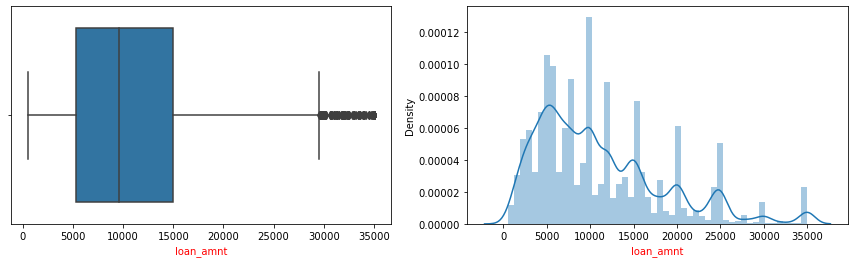

In [96]:
plot_histbox(final_loan, 'loan_amnt')

In [97]:
final_loan[final_loan['loan_amnt'] >= np.quantile(final_loan.loan_amnt, 0.75)][['loan_amnt', 'loan_status']]
# len(final_loan[final_loan['loan_amnt'] >= np.quantile(final_loan.loan_amnt, 0.75)])

,loan_amnt,loan_status
20,20250,Fully Paid
21,21000,Charged Off
25,15000,Fully Paid
31,31825,Fully Paid
37,15000,Fully Paid
...,...,...
39653,20000,Charged Off
39654,18500,Fully Paid
39666,15450,Charged Off
39688,20000,Charged Off


#### Interest Rate

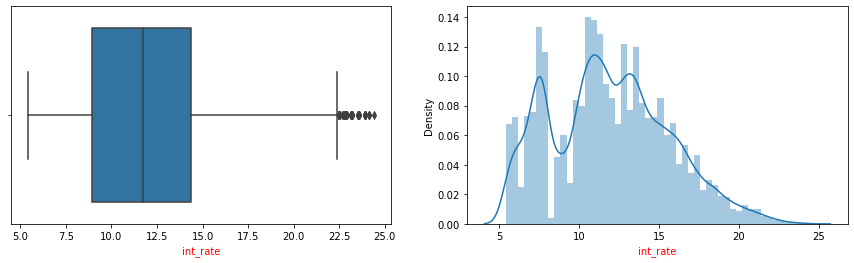

In [98]:
plot_histbox(final_loan, 'int_rate')

#### Annual Income

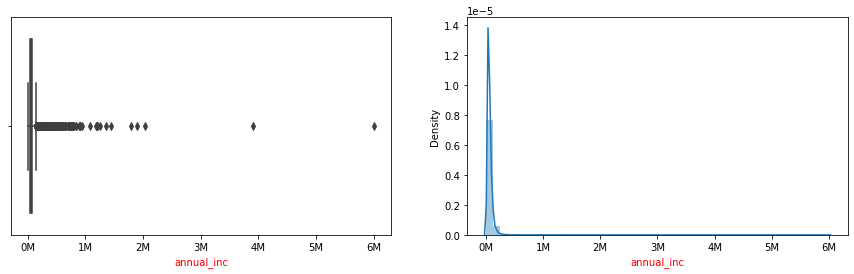

In [99]:
plt.figure(figsize= (15, 4))


plt.subplot(1, 2, 1)
sns.boxplot(x = "annual_inc", data=final_loan)
plt.xlabel("annual_inc", fontdict= {'fontsize':10, 'fontweight':3, 'color':'Red'})
ticks = np.arange(0, 7000000, 1000000)
labels = ["{}M".format(i//1000000) for i in ticks]
plt.xticks(ticks, labels)

plt.subplot(1, 2, 2)
sns.distplot(final_loan['annual_inc'])
plt.xlabel('annual_inc', fontdict= {'fontsize':10, 'fontweight':3, 'color':'Red'})
ticks = np.arange(0, 7000000, 1000000)
labels = ["{}M".format(i//1000000) for i in ticks]
plt.xticks(ticks, labels)
    
plt.show()

In [100]:
final_loan[final_loan.annual_inc > 1000000]['loan_status']

7247      Fully Paid
10621    Charged Off
21412     Fully Paid
23551     Fully Paid
24166     Fully Paid
25762     Fully Paid
27564     Fully Paid
28906     Fully Paid
29639     Fully Paid
30107     Fully Paid
33432     Fully Paid
33982     Fully Paid
34304     Fully Paid
39089     Fully Paid
Name: loan_status, dtype: object

**Removing outliers**

In [101]:
final_loan = final_loan[~(final_loan.annual_inc > 1000000)]
final_loan.shape

(38483, 18)

#### DTI

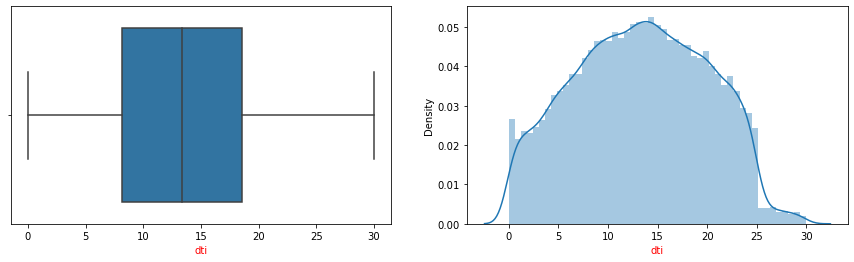

In [102]:
plot_histbox(final_loan, 'dti')

#### Employment Length 

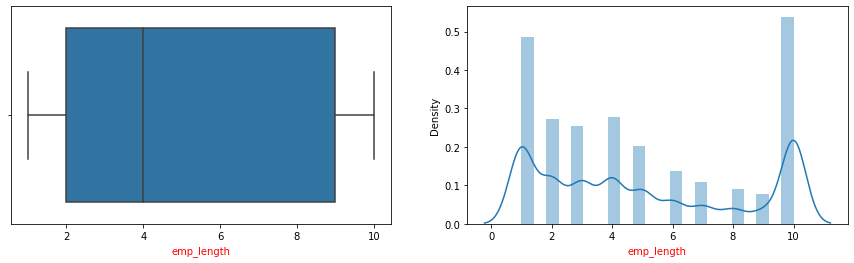

In [103]:
plot_histbox(final_loan, 'emp_length')

## Univariate Analysis

In [104]:
##Plotting Barplots
def plot_bar(dataset, col):
    fig, ax = plt.subplots(figsize=(12,4), ncols=2)
    sns.barplot(x=col, y=final_loan[col].value_counts(normalize=True).reset_index(drop=True), ax=ax[0], data=final_loan, color='#95F985')
    sns.barplot(x=col, y=final_loan[col].value_counts().reset_index(drop=True), ax=ax[1], data=final_loan, color='#00FEEF')


### Loan Status

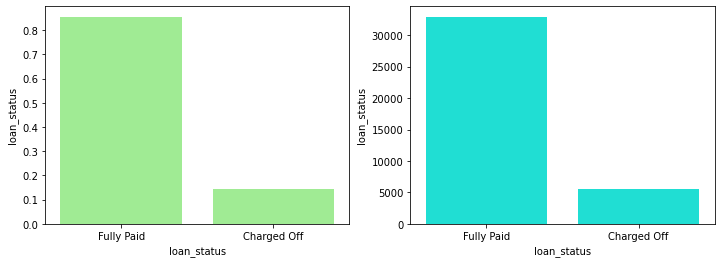

In [105]:
plot_bar(final_loan, 'loan_status')

### Term

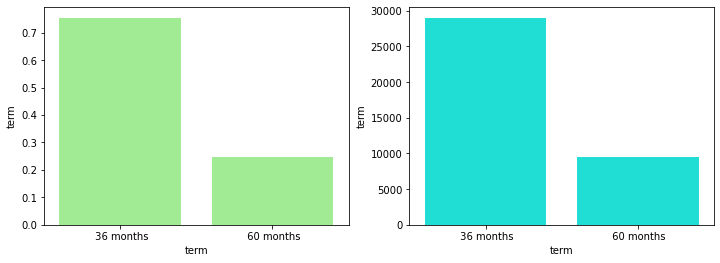

In [106]:
plot_bar(final_loan, 'term')

### Grade

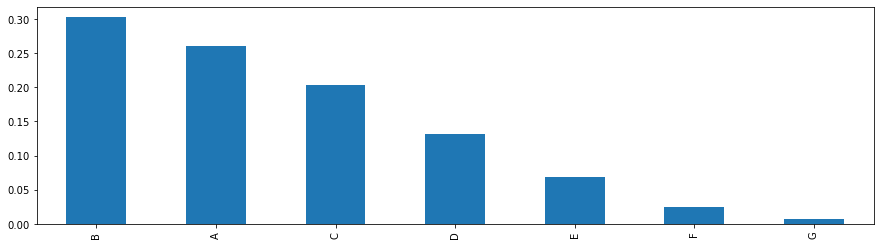

In [107]:
plt.figure(figsize=(15, 4))
final_loan.grade.value_counts(normalize=True).plot.bar()
plt.show()

### Sub Grade

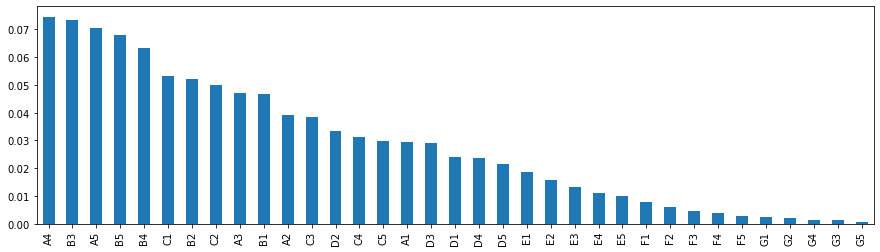

In [108]:
plt.figure(figsize=(15, 4))
final_loan.sub_grade.value_counts(normalize=True).plot.bar()
plt.show()

### Home Ownership

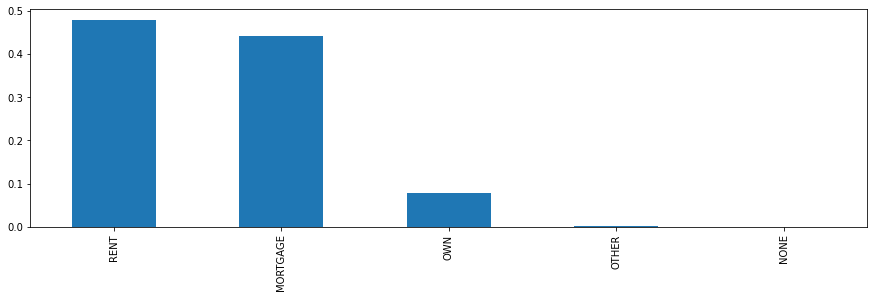

In [109]:
plt.figure(figsize=(15, 4))
final_loan.home_ownership.value_counts(normalize=True).plot.bar()
plt.show()

### Verification Status

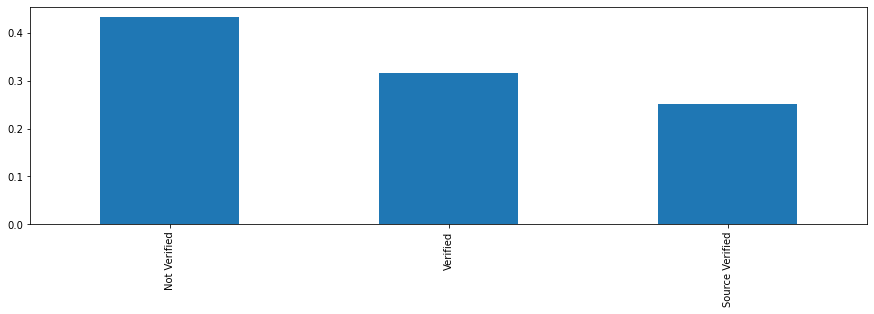

In [110]:
plt.figure(figsize=(15, 4))
final_loan.verification_status.value_counts(normalize=True).plot.bar()
plt.show()

### Purpose

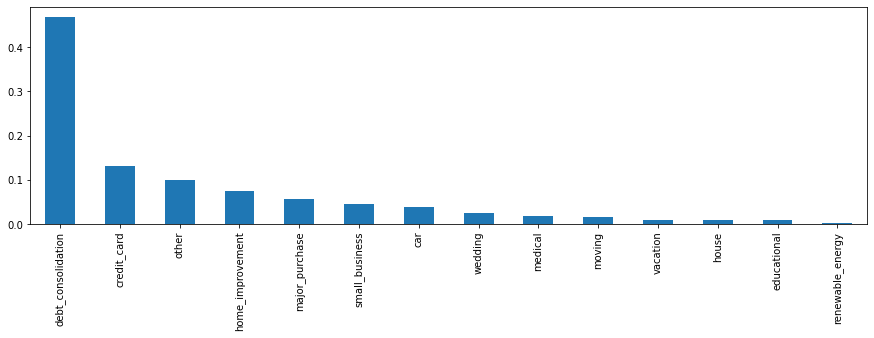

In [111]:
plt.figure(figsize=(15, 4))
final_loan.purpose.value_counts(normalize=True).plot.bar()
plt.show()

### Address State

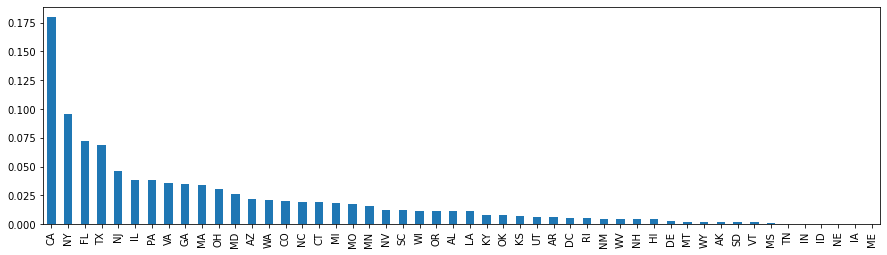

In [112]:
plt.figure(figsize=(15, 4))
final_loan.addr_state.value_counts(normalize=True).plot.bar()
plt.show()

### Issue Year

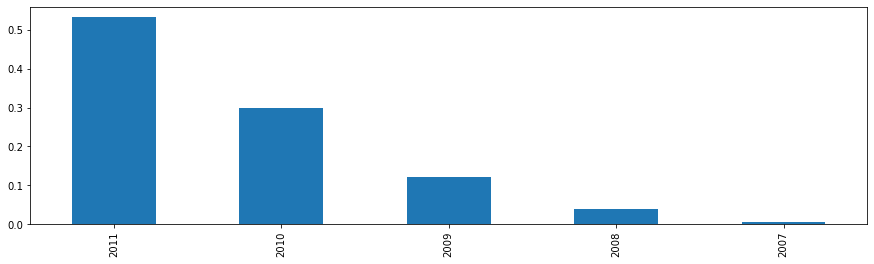

In [113]:
plt.figure(figsize=(15, 4))
final_loan.issue_year.value_counts(normalize=True).plot.bar()
plt.show()

### Issue Month

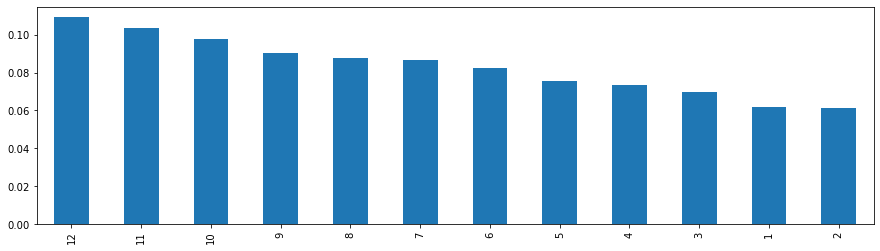

In [114]:
plt.figure(figsize=(15, 4))
final_loan.issue_month.value_counts(normalize=True).plot.bar()
plt.show()

## Segmented Univariate Analysis

In [115]:
def plot_segbox(dataset, col):
    plt.figure(figsize= (15, 4))


    plt.subplot(1, 2, 1)
    sns.boxplot(x = col, y="loan_status", data=dataset)
    plt.xlabel(col, fontdict= {'fontsize':10, 'fontweight':3, 'color':'Red'})
    plt.ylabel("loan_status", fontdict= {'fontsize':10, 'fontweight':3, 'color':'Red'})
    plt.subplot(1, 2, 2)
    sns.distplot(dataset[col])
    plt.xlabel(col, fontdict= {'fontsize':10, 'fontweight':3, 'color':'Red'})
    
    plt.show()

### Loan Amount

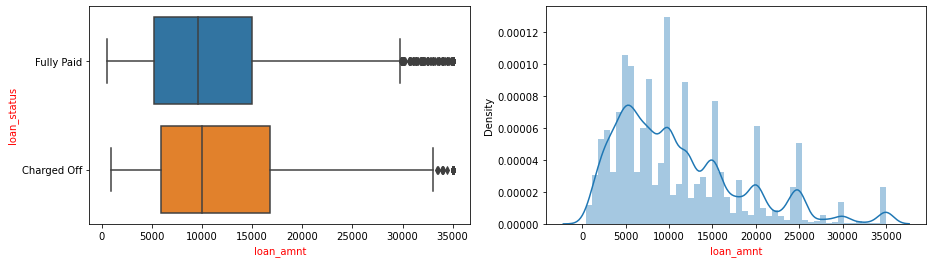

In [116]:
plot_segbox(final_loan, "loan_amnt")

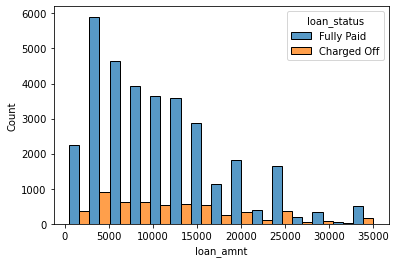

In [117]:
sns.histplot(data=final_loan, x="loan_amnt", hue="loan_status", multiple="dodge", bins=15)
plt.show()

In [118]:
##create bins of loan_amnt
final_loan['loan_amnt_bin'] = pd.cut(final_loan.loan_amnt, bins=np.arange(0, 36000, 5000), 
                                     labels = ["{}-{}K".format(x//1000,(x//1000)+5) for x in range(0, 35000, 5000)])

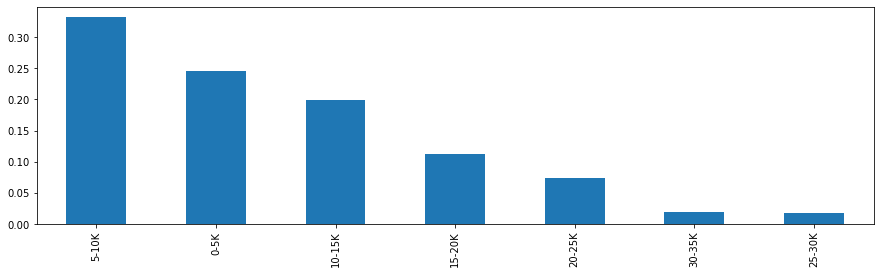

In [119]:
plt.figure(figsize=(15, 4))
final_loan.loan_amnt_bin.value_counts(normalize=True).plot.bar()
plt.show()

### Interest Rate

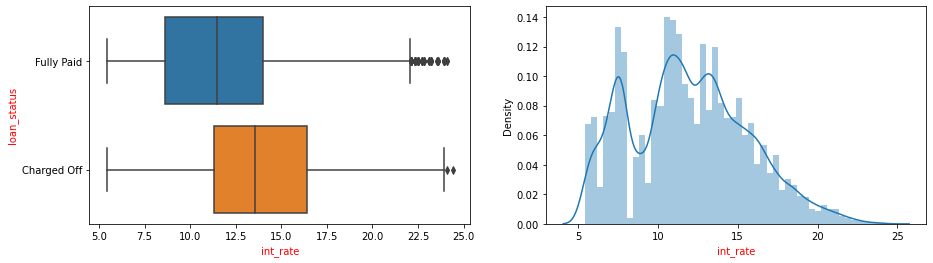

In [120]:
plot_segbox(final_loan, "int_rate")

In [121]:
final_loan['int_rate_bin'] = round(final_loan['int_rate'])

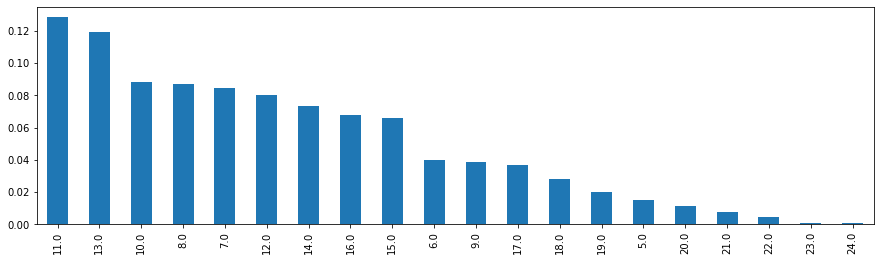

In [122]:
plt.figure(figsize=(15, 4))
final_loan.int_rate_bin.value_counts(normalize=True).plot.bar()
plt.show()

### Installment

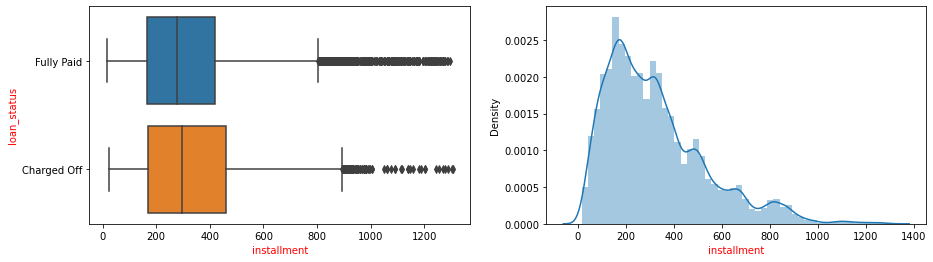

In [123]:
plot_segbox(final_loan, "installment")

### DTI

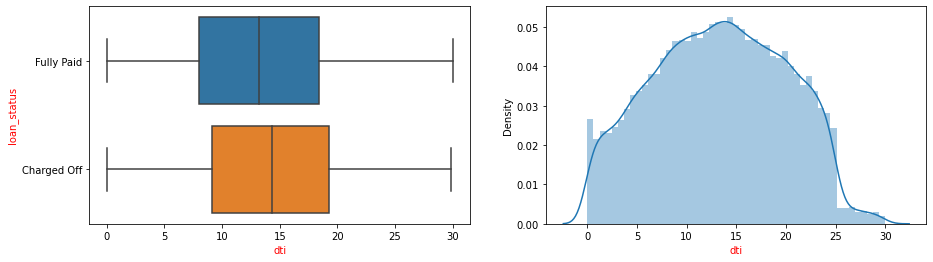

In [124]:
plot_segbox(final_loan, "dti")

### Annual Income

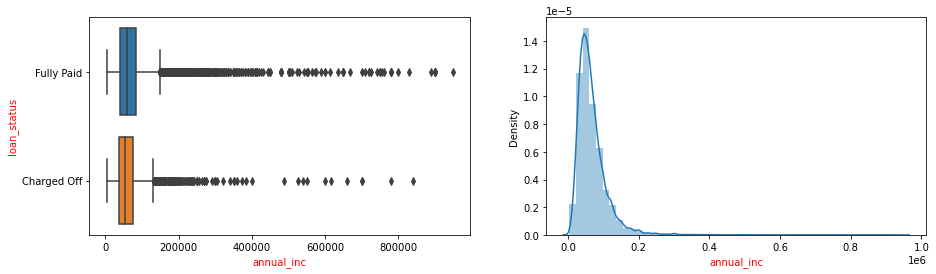

In [125]:
plot_segbox(final_loan, "annual_inc")

In [126]:
final_loan['annual_inc_bin'] = pd.cut(final_loan[final_loan.annual_inc <= 400000].annual_inc, 
                                      bins= range(0, 400001, 20000), 
                                      labels= ["{}-{}K".format(x//1000, (x//1000)+20)  for x in range(0, 400000, 20000)])

In [127]:
final_loan['annual_inc_bin'] = final_loan.annual_inc_bin.astype('category')

In [128]:
final_loan['annual_inc_bin'] = final_loan.annual_inc_bin.cat.add_categories(['>400K'])

In [129]:
final_loan.annual_inc_bin.cat.categories

Index(['0-20K', '20-40K', '40-60K', '60-80K', '80-100K', '100-120K',
       '120-140K', '140-160K', '160-180K', '180-200K', '200-220K', '220-240K',
       '240-260K', '260-280K', '280-300K', '300-320K', '320-340K', '340-360K',
       '360-380K', '380-400K', '>400K'],
      dtype='object')

In [130]:
final_loan.annual_inc_bin.fillna('>400K', inplace=True)

In [131]:
final_loan.annual_inc_bin.value_counts()

40-60K      11245
20-40K       8499
60-80K       7606
80-100K      4506
100-120K     2326
120-140K     1217
0-20K        1165
140-160K      710
160-180K      383
180-200K      270
200-220K      115
220-240K      102
>400K          76
240-260K       73
280-300K       65
260-280K       44
300-320K       20
340-360K       20
320-340K       19
380-400K       15
360-380K        7
Name: annual_inc_bin, dtype: int64

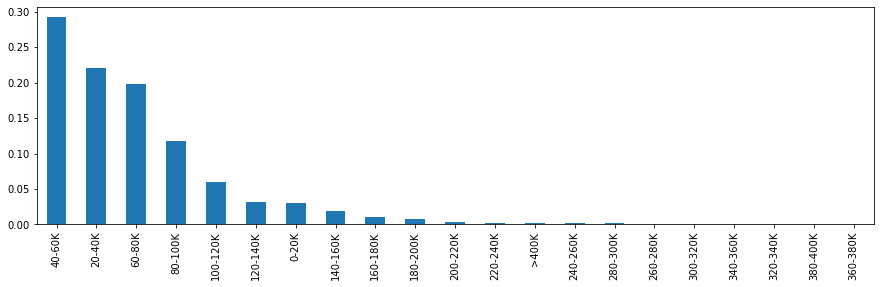

In [132]:
plt.figure(figsize=(15, 4))
final_loan.annual_inc_bin.value_counts(normalize=True).plot.bar()
plt.show()

#### Employee Length

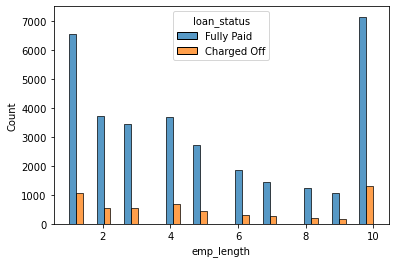

In [133]:
sns.histplot(data=final_loan, x="emp_length", hue="loan_status", multiple="dodge")
plt.show()

#### Issue year

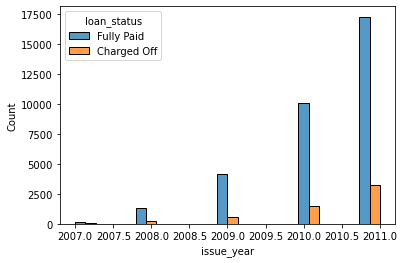

In [134]:
sns.histplot(data=final_loan, x="issue_year", hue="loan_status", multiple="dodge", bins=15)
plt.show()

## Bivariate Analysis

In [135]:
plt.style.use("ggplot")

### Seeing plot for all numerical variables

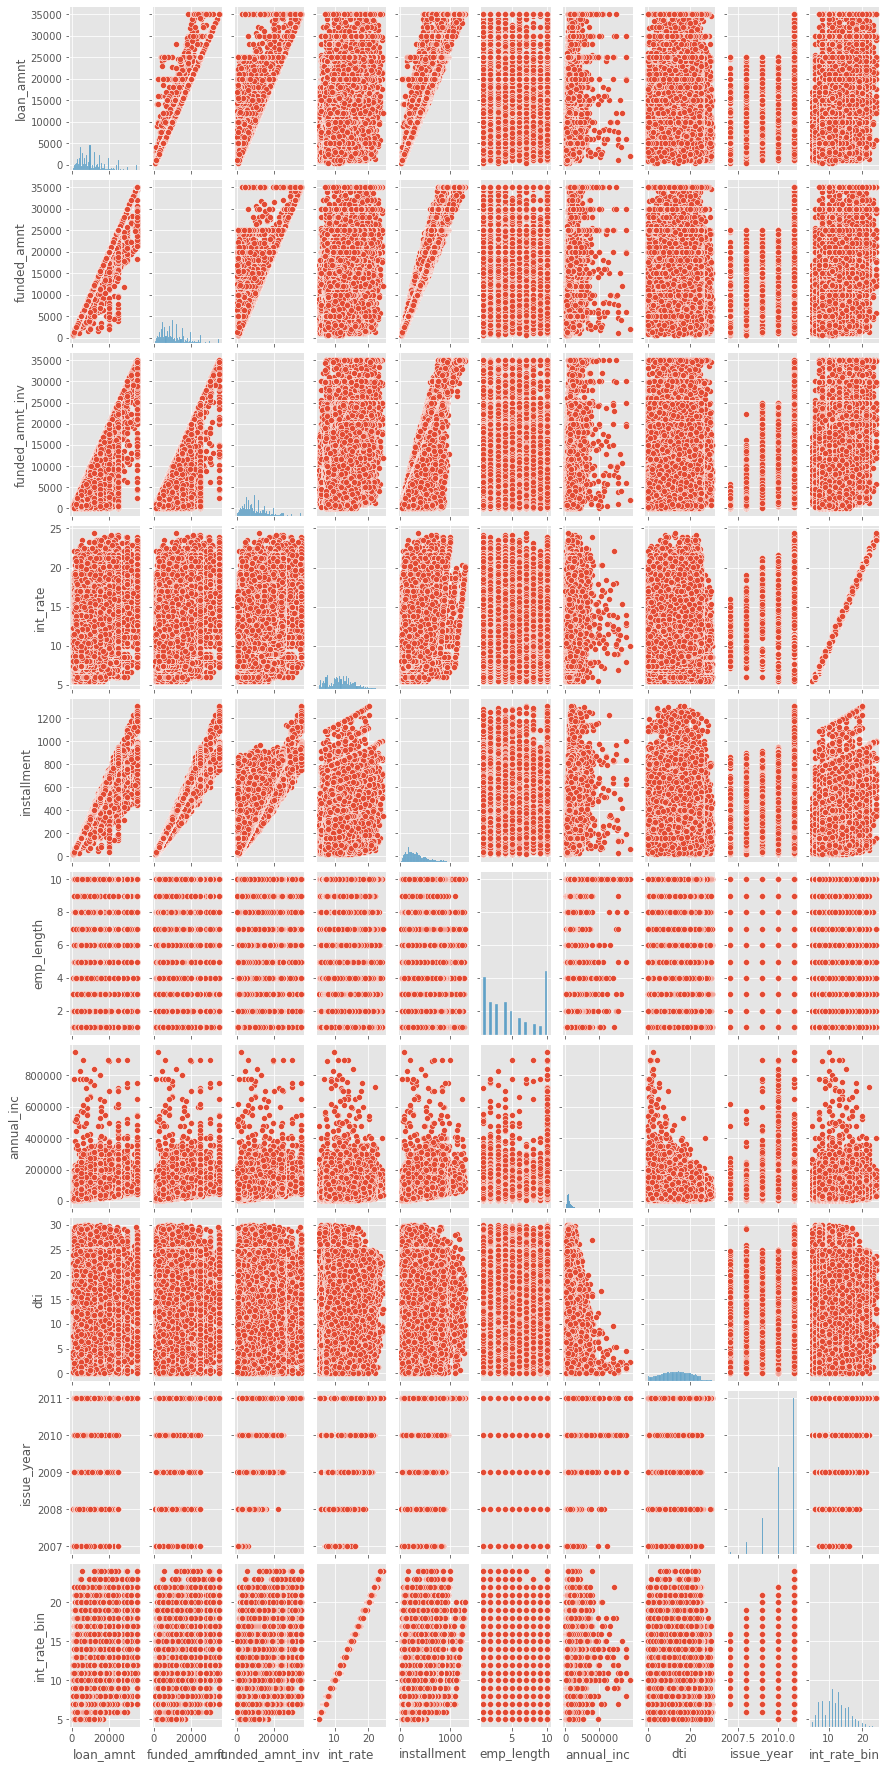

In [136]:
sns.pairplot(final_loan.select_dtypes(include=[np.number]).drop(['issue_month'], axis=1), aspect=0.5)
plt.show()

### Checking correlation among variables

In [137]:
cor_plot = final_loan.select_dtypes(include=[np.number]).drop(['issue_month'], axis=1).corr()

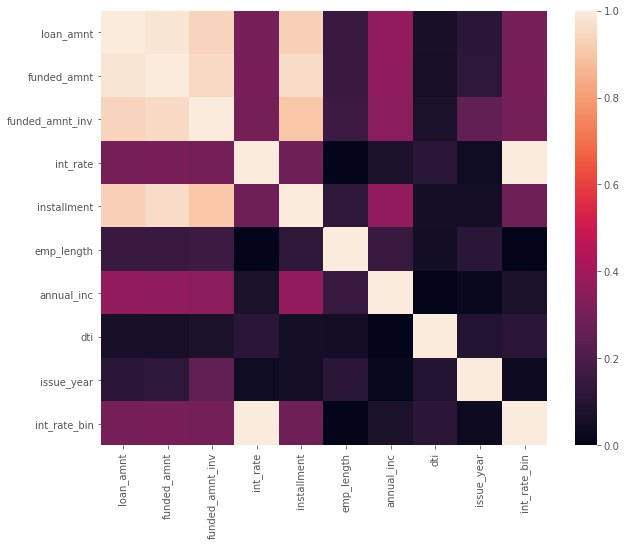

In [138]:
plt.figure(figsize=(10, 8))
sns.heatmap(cor_plot, vmax=1, vmin=0)
plt.show()

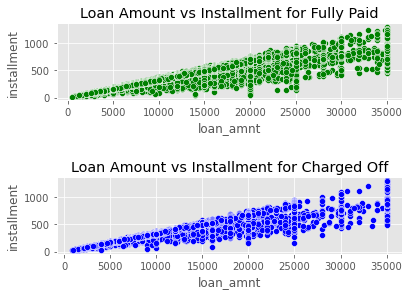

In [139]:
fig, ax = plt.subplots(nrows=2)

g1 = sns.scatterplot(data=final_loan[final_loan.loan_status=="Fully Paid"], x='loan_amnt', y='installment', ax=ax[0], color="green")
g1.set_title("Loan Amount vs Installment for Fully Paid")

g2 = sns.scatterplot(data=final_loan[final_loan.loan_status=="Charged Off"], x='loan_amnt', y='installment', ax=ax[1], color="blue")
g2.set_title("Loan Amount vs Installment for Charged Off")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=1, 
                    hspace=1)

plt.show()

##### Dropping correlated variables

In [140]:
final_loan.drop(['funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment'], axis=1, inplace=True)

In [141]:
final_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38483 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   loan_amnt            38483 non-null  int64   
 1   emp_length           38483 non-null  float64 
 2   annual_inc           38483 non-null  float64 
 3   dti                  38483 non-null  float64 
 4   term                 38483 non-null  object  
 5   grade                38483 non-null  object  
 6   sub_grade            38483 non-null  object  
 7   home_ownership       38483 non-null  object  
 8   verification_status  38483 non-null  object  
 9   loan_status          38483 non-null  object  
 10  purpose              38483 non-null  object  
 11  addr_state           38483 non-null  object  
 12  issue_year           38483 non-null  int64   
 13  issue_month          38483 non-null  int64   
 14  loan_amnt_bin        38483 non-null  category
 15  int_rate_bin       

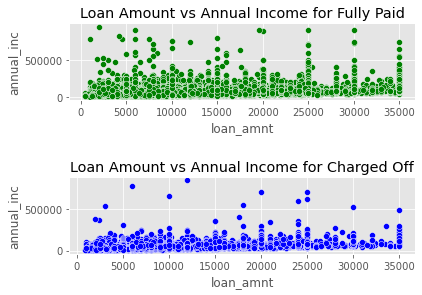

In [142]:
fig, ax = plt.subplots(nrows=2)

g1 = sns.scatterplot(data=final_loan[final_loan.loan_status=="Fully Paid"], x='loan_amnt', y='annual_inc', ax=ax[0], color="green")
g1.set_title("Loan Amount vs Annual Income for Fully Paid")

g2 = sns.scatterplot(data=final_loan[final_loan.loan_status=="Charged Off"], x='loan_amnt', y='annual_inc', ax=ax[1], color="blue")
g2.set_title("Loan Amount vs Annual Income for Charged Off")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=1, 
                    hspace=1)

plt.show()

**Dropping annual_inc variable on further exploration as we have already binned this variable which is more relevant for our analysis**

In [143]:
final_loan.drop(['annual_inc'], axis=1, inplace=True)

### Bivariate Analysis for Categorical Variables

In [164]:
def biv_cat_str(dataset, col):
    cs = pd.crosstab(dataset[col], dataset['loan_status'])
    cs.plot(kind="bar", stacked=False)
    plt.show()

In [144]:
def biv_cat(dataset, col):
    cs = pd.crosstab(dataset[col], dataset['loan_status'], normalize='index')
    cs.plot(kind="bar", stacked=True)
    plt.show()

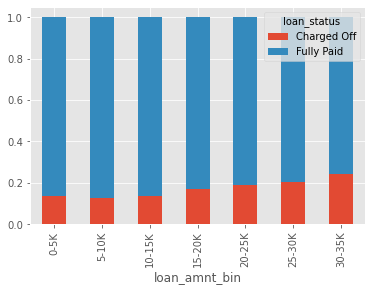

In [145]:
biv_cat(final_loan, "loan_amnt_bin")

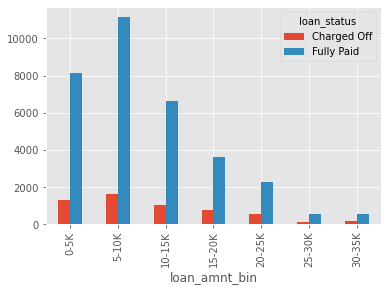

In [165]:
biv_cat_str(final_loan, "loan_amnt_bin")

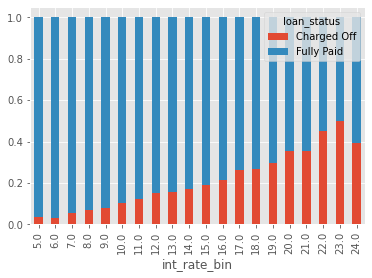

In [146]:
biv_cat(final_loan, "int_rate_bin")

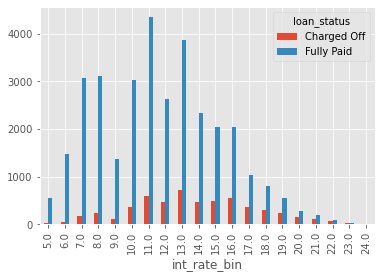

In [166]:
biv_cat_str(final_loan, "int_rate_bin")

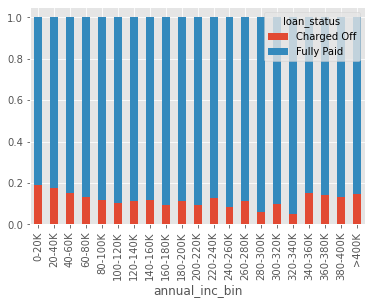

In [147]:
biv_cat(final_loan, "annual_inc_bin")

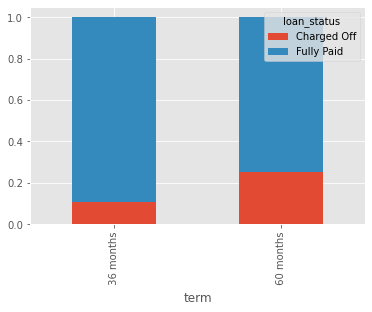

In [148]:
biv_cat(final_loan, "term")

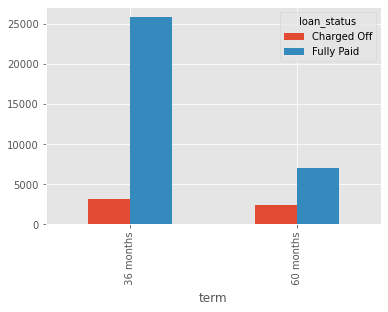

In [167]:
biv_cat_str(final_loan, "term")

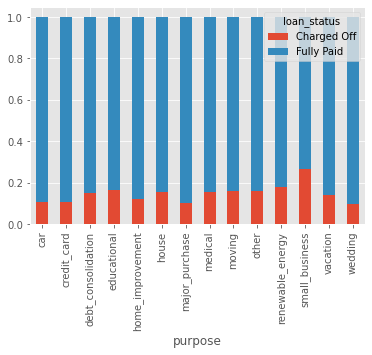

In [149]:
biv_cat(final_loan, "purpose")

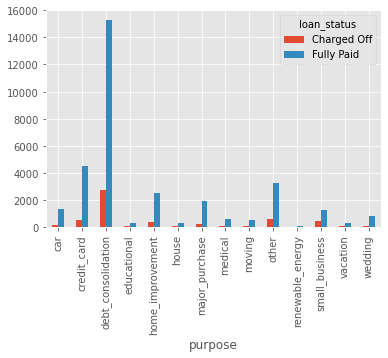

In [168]:
biv_cat_str(final_loan, "purpose")

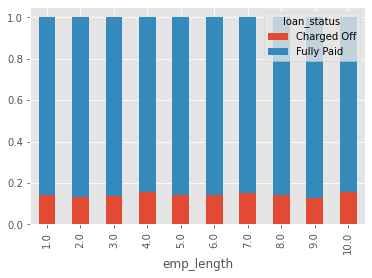

In [150]:
biv_cat(final_loan, "emp_length")

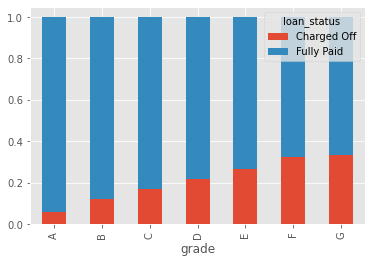

In [151]:
biv_cat(final_loan, "grade")

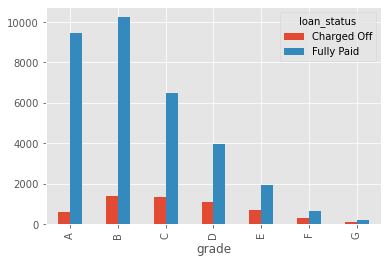

In [169]:
biv_cat_str(final_loan, "grade")

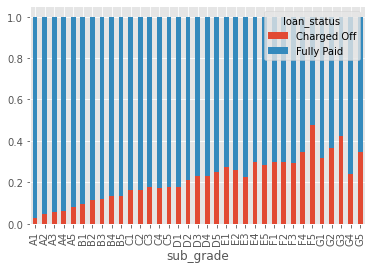

In [152]:
biv_cat(final_loan, "sub_grade")

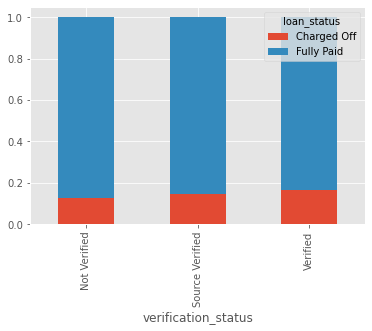

In [153]:
biv_cat(final_loan, "verification_status")

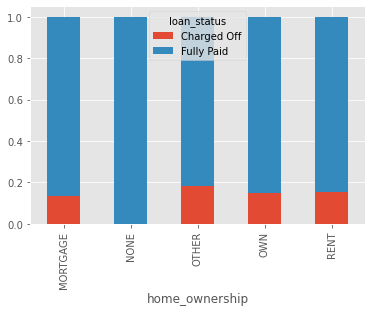

In [154]:
biv_cat(final_loan, "home_ownership")

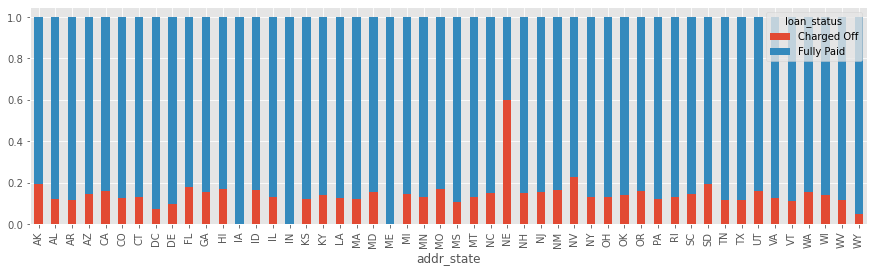

In [155]:
cs = pd.crosstab(final_loan['addr_state'], final_loan['loan_status'], normalize='index')
cs.plot(kind="bar", stacked=True, figsize=(15, 4))
plt.show()

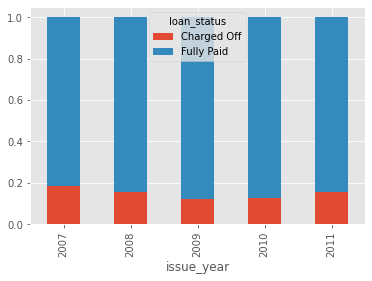

In [156]:
biv_cat(final_loan, "issue_year")

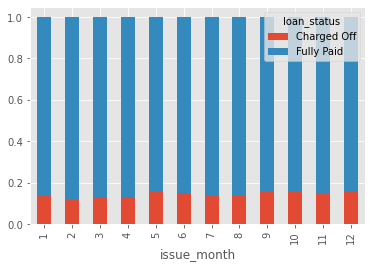

In [157]:
biv_cat(final_loan, "issue_month")

**Dropping irrelevant variables**

In [158]:
final_loan.drop(['loan_amnt', 'issue_month'], axis=1, inplace=True)

**Checking median DTI for various loan_amount ranges for different loan_status**

In [159]:
pivot = pd.pivot_table(data=final_loan, values="dti", index="loan_amnt_bin", columns="loan_status", aggfunc=np.median)

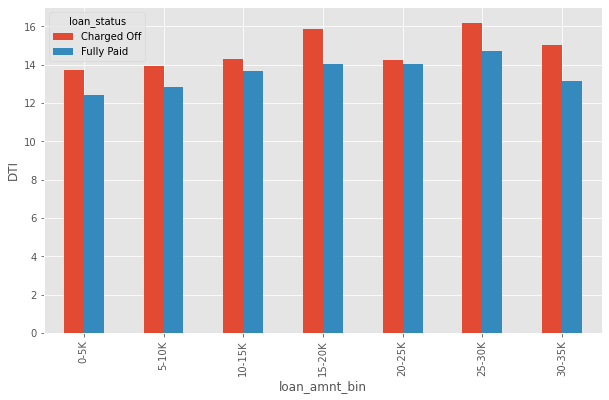

In [160]:
pivot.plot(kind="bar", stacked=False, figsize=[10, 6])
plt.ylabel("DTI")
plt.show()

## Multivariate Analysis

In [161]:
def mul_cat(dataset, col1, col2):
    cs1 = pd.crosstab(dataset[dataset.loan_status=="Fully Paid"][col1], dataset[dataset.loan_status=="Fully Paid"][col2], 
                     normalize='index')
    cs1.plot(kind="bar", stacked=True)
    plt.title("For Fully Paid")
    
    cs2 = pd.crosstab(dataset[dataset.loan_status=="Charged Off"][col1], dataset[dataset.loan_status=="Charged Off"][col2], 
                     normalize='index')
    cs2.plot(kind="bar", stacked=True)
    plt.title("For Charged Off")
    
    plt.show()

**Multivariate analysis for int_rate_bin and loan_amnt_bin for different loan_status**

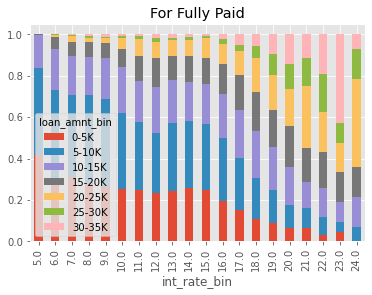

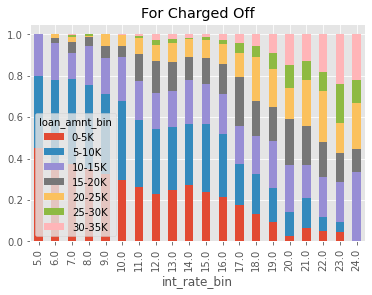

In [162]:
mul_cat(final_loan, "int_rate_bin", "loan_amnt_bin")

**Multivariate analysis for purpose and loan_amnt_bin for different loan_status**

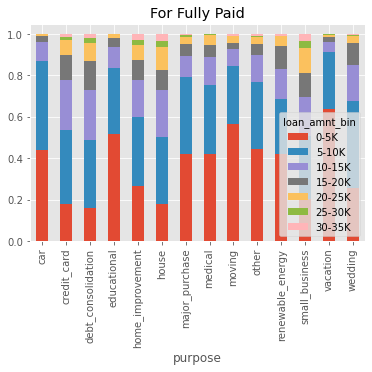

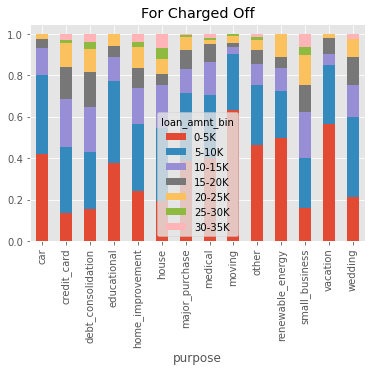

In [163]:
mul_cat(final_loan, "purpose", "loan_amnt_bin")